# Deep Neural Networks 
## Session 25c

##  [Yolo V3](https://pjreddie.com/darknet/yolo/)

<img src='../../prasami_images/prasami_color_tutorials_small.png' style = 'width:400px;' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>


- Based on https://github.com/experiencor/keras-yolo3
- Additional Dataset https://cocodataset.org/#home

In [24]:
### Import Libraries

import tensorflow as tf

import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle


# import struct

from utils.yolov3_util import decode_netout, WeightReader, correct_yolo_boxes, do_nms, make_yolov3_model

# from tensorflow.keras.layers import Conv2D

# from tensorflow.keras.layers import Input
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.layers import LeakyReLU
# from tensorflow.keras.layers import ZeroPadding2D
# from tensorflow.keras.layers import UpSampling2D
# from tensorflow.keras.layers import add, concatenate
# from tensorflow.keras.models import Model

physical_devices = tf.config.list_physical_devices('GPU') 

tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [25]:
# Some basic parameters

inpDir = '../../input' # location where input data is stored
outDir = '../output' # location to store outputs
mdlDir = '../models' # location to store outputs
imgDir = 'yolo_images'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
EPOCHS = 100 # number of cycles to run

# Set parameters for decoration of plots
params = {'legend.fontsize' : 'medium',
          'figure.figsize'  : (15,15),
          'axes.labelsize'  : 'large',
          'axes.titlesize'  :'large',
          'xtick.labelsize' :'medium',
          'ytick.labelsize' :'medium'
         }

plt.rcParams.update(params) # update rcParams

## Overview
The most salient feature of v3 is that it makes detections at three different scales.
### [Bounding box](http://christopher5106.github.io/object/detectors/2017/08/10/bounding-box-object-detectors-understanding-yolo.html)
YOLO v3 predicts boxes at 3 different scales. For the same image of 416 x 416, the number of predicted boxes are 10,647.

- For the 13x13 feature map, there are 13 * 13 * 3 = 507 anchor boxes.  (416/32)
- For the 26x26 feature map, there are 26 * 26 * 3 = 2,028 anchor boxes. (416/16)
- For the 52x52 feature map, there are 52 * 52 * 3 = 8,112 anchor boxes. (416/8)

Total 10647 anchor boxes

In [26]:
416/32

13.0

In [27]:
# define the labels
'''labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
          "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
          "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
          "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
          "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
          "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
          "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
          "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
          "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
          "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
'''
labels = ["person", "bicycle", "car", "motorbike", "pottedplant"]

# define the expected input shape for the model
input_w, input_h = 416, 416

# Anchor Size
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]

# define the probability threshold for detected objects
class_threshold = 0.1 #0.7 # 0.3

nonmaxsup_threshold= 0.2 #0.45 #0.2

## Note on Anchor Box:
**Anchor box dimensions:** Each sub-list contains the dimensions (width, height) of the anchor boxes. The dimensions are specified in pairs. For example, the first sub-list [116,90, 156,198, 373,326] contains three anchor boxes with dimensions (116, 90), (156, 198), and (373, 326).

### Breaking down the anchors parameter:
**First set of anchors ([116,90, 156,198, 373,326]):**
These anchor boxes are used on the coarsest feature map (usually downsampled by a factor of 32).

**Second set of anchors ([30,61, 62,45, 59,119]):**
These anchor boxes are used on the medium-resolution feature map (usually downsampled by a factor of 16).

**Third set of anchors ([10,13, 16,30, 33,23]):**
These anchor boxes are used on the finest feature map (usually downsampled by a factor of 8).

The purpose of having multiple sets of anchors at different scales is to allow YOLOv3 to detect objects of varying sizes effectively. The coarser scales with larger anchor boxes are better suited for detecting large objects, while the finer scales with smaller anchor boxes are better suited for detecting small objects. This multi-scale detection approach enhances the model's ability to accurately predict bounding boxes for objects of different sizes within the same image.

In [28]:
model = make_yolov3_model() # define the model

weight_reader = WeightReader(os.path.join(mdlDir, 'yolov3.weights')) # load the model weights

weight_reader.load_weights(model) # set the model weights into the model


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # Compile the model

# save the model to file
model.save(os.path.join(mdlDir, 'yolo3_model.keras'))

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [29]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv_0 (Conv2D)             (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 bnorm_0 (BatchNormalizatio  (None, None, None, 32)       128       ['conv_0[0][0]']              
 n)                                                                                               
                                                                                                  
 leaky_0 (LeakyReLU)         (None, None, None, 32)       0         ['bnorm_0[0][0]']       

In [30]:
# load yolov3 model
# model = tf.keras.models.load_model(os.path.join(mdlDir, 'yolo3_model.h5'))

# tf.keras.utils.plot_model(
#     model,
#     to_file=os.path.join(mdlDir, 'yolov3.png'),
#     show_shapes=True,
#     show_dtype=True)


In [31]:
# load and prepare an image
def load_image_pixels(filename, shape):
    
    # load the image to get its shape
    image = tf.keras.preprocessing.image.load_img(filename)
    width, height = image.size
    
    # load the image with the required size (Should not we be better off loading once????)
    #image = tf.keras.preprocessing.image.load_img(filename, target_size=shape) # as per original paper
    image = tf.keras.preprocessing.image.smart_resize(image,shape)

    # convert to a 3D Numpy array. 
    image = tf.keras.preprocessing.image.img_to_array(image)
    
    # scale values to between 0 and 1
    image = image.astype('float32')
    image /= 255.0
    
    #print ('before expand', image.shape, 'max pixel value', image.max())
    
    # add a dimension so that we have one sample
    image = tf.expand_dims(image, 0)
    #print ('after expand', image.shape)
    
    return image, width, height

In [32]:
# get all of the results above a threshold
def get_boxes(boxes, labels, thresh):
    v_boxes, v_labels, v_scores = list(), list(), list()

    # iterate all boxes
    for box in boxes:
        
        # iteratare all possible labels
        for i in range(len(labels)):
            
            # check if the threshold for this label is high enough to be listed
            if box.classes[i] > thresh:
                v_boxes.append(box)
                v_labels.append(labels[i])
                v_scores.append(box.classes[i]*100) # don't break, many labels may trigger for one box
                
    return v_boxes, v_labels, v_scores

In [33]:
# draw all results
def draw_boxes(filename, v_boxes, v_labels, v_scores):
    
    # load the image
    data = plt.imread(filename)
    
    # plot the image
    plt.imshow(data)
    
    # get the context for drawing boxes
    ax = plt.gca()

    # plot each box
    for i in range(len(v_boxes)):

        box = v_boxes[i]
        
        # get coordinates
        y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
        
        # calculate width and height of the box
        width, height = x2 - x1, y2 - y1
        
        # create the shape
        rect = Rectangle((x1, y1), width, height, fill=False, color='white')
        
        # draw the box
        ax.add_patch(rect)
        
        # draw text and score in top left corner
        label = "{:s} ({:.0f}%)".format(v_labels[i], v_scores[i])
        
        plt.text(x1, y1, label, color='white')
        
        img_name = filename.split('/')[-1]      
        plt.savefig(os.path.join(outDir, img_name))
    
    # show the plot
    plt.show()

In [34]:
test_data_dir = os.path.join(inpDir, imgDir)
    
imgList = [f for f in os.listdir(test_data_dir) if os.path.isfile(os.path.join(test_data_dir, f))]

In [35]:
imgList

['IMG_1293_mod.png',
 'IMG_1295.JPG',
 'IMG_1293_mod.xcf',
 'street.jpg',
 'IMG_1292.JPG',
 'IMG_1296.JPG']

In [36]:
# define our new photo
photo_filename = os.path.join(test_data_dir, imgList[0])


# load and prepare image
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))

# make prediction
y_pred = model.predict(image)

# summarize the shape of the list of arrays
print([a.shape for a in y_pred])

boxes = list()
for i in range(len(y_pred)):
    # decode the output of the network
    boxes += decode_netout(y_pred[i][0], anchors[i], class_threshold, nonmaxsup_threshold, input_h, input_w)

# correct the sizes of the bounding boxes for the shape of the image
correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)

# suppress non-maximal boxes
do_nms(boxes, nonmaxsup_threshold)

# get the details of the detected objects
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

# What did you find in the picture
for i in range(len(v_boxes)):
    print(v_labels[i], v_scores[i])

1/1 [==============================] - 1s 562ms/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
car 97.96131253242493
car 11.290434002876282
person 25.69820284843445
person 85.94492077827454


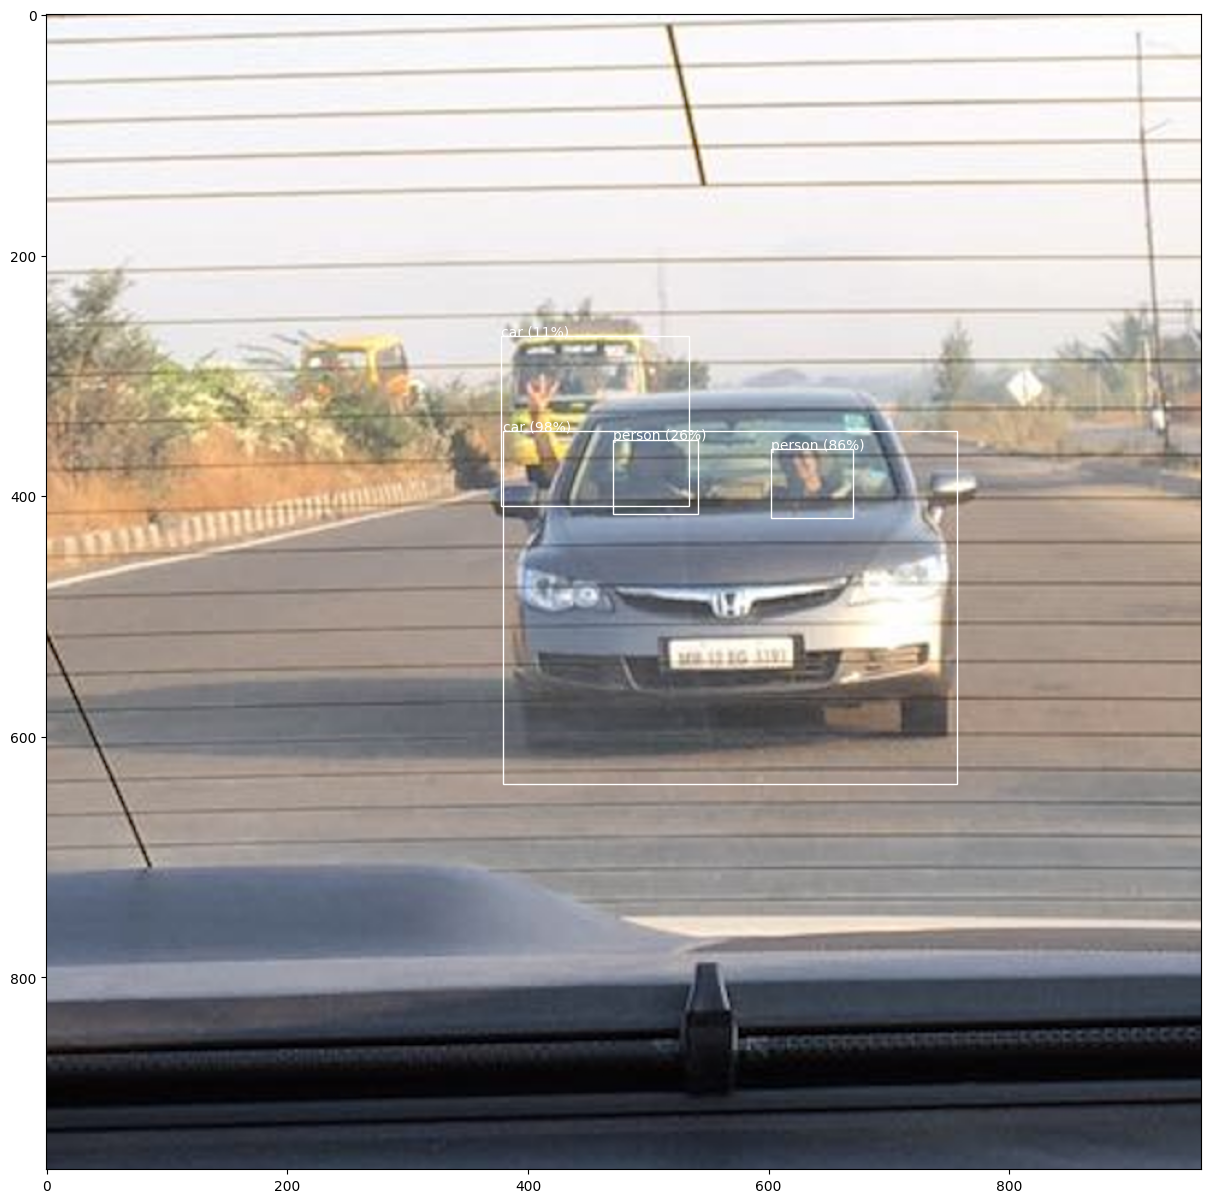

In [37]:
draw_boxes(photo_filename, v_boxes, v_labels, v_scores)

In [38]:
len(y_pred)

3

In [39]:
y_pred[0][0].shape, anchors[0]

((13, 13, 255), [116, 90, 156, 198, 373, 326])

In [40]:
grid_h, grid_w = y_pred[0][0].shape[:2]
grid_h, grid_w

(13, 13)

In [41]:
y_pred[0][0][..., :2]

array([[[0.42410854, 0.57156533],
        [0.6073285 , 0.6065222 ],
        [0.6016198 , 0.56978595],
        [0.5106258 , 0.61290205],
        [0.5475636 , 0.57046795],
        [0.6574413 , 0.54549885],
        [0.37296474, 0.6114771 ],
        [0.31447425, 0.6092223 ],
        [0.37547255, 0.62056255],
        [0.4841557 , 0.6218236 ],
        [0.38181075, 0.6207073 ],
        [0.32442772, 0.60972416],
        [0.47406256, 0.4640999 ]],

       [[0.41341457, 0.6421845 ],
        [0.573922  , 0.667242  ],
        [0.6108511 , 0.57871884],
        [0.52418226, 0.5434287 ],
        [0.4989372 , 0.51100266],
        [0.6030478 , 0.42081827],
        [0.30702332, 0.3892118 ],
        [0.32204866, 0.32751074],
        [0.49600095, 0.33617312],
        [0.61174035, 0.46549433],
        [0.40929815, 0.53331184],
        [0.3782605 , 0.60285753],
        [0.42901784, 0.5515589 ]],

       [[0.40408558, 0.45569754],
        [0.6299027 , 0.45232695],
        [0.55938154, 0.48501685],
        [0

In [42]:
objectness = y_pred[0][0][..., :4]
objectness

array([[[ 4.24108535e-01,  5.71565330e-01,  4.68333960e-01,
         -4.78411138e-01],
        [ 6.07328475e-01,  6.06522202e-01,  3.50236446e-01,
         -5.78382075e-01],
        [ 6.01619780e-01,  5.69785953e-01,  6.25446856e-01,
         -8.01299810e-01],
        [ 5.10625780e-01,  6.12902045e-01,  7.01124012e-01,
         -8.91371369e-01],
        [ 5.47563612e-01,  5.70467949e-01,  9.84329343e-01,
         -9.71068263e-01],
        [ 6.57441318e-01,  5.45498848e-01,  1.23834538e+00,
         -1.03377366e+00],
        [ 3.72964740e-01,  6.11477077e-01,  1.22353005e+00,
         -9.66761351e-01],
        [ 3.14474255e-01,  6.09222293e-01,  1.19178867e+00,
         -1.03276896e+00],
        [ 3.75472546e-01,  6.20562553e-01,  9.84576941e-01,
         -9.83346939e-01],
        [ 4.84155715e-01,  6.21823609e-01,  8.83605003e-01,
         -9.60801840e-01],
        [ 3.81810755e-01,  6.20707273e-01,  7.11779833e-01,
         -8.80782962e-01],
        [ 3.24427724e-01,  6.09724164e-01, 

In [43]:
y_pred[1][0].shape, anchors[1]

((26, 26, 255), [30, 61, 62, 45, 59, 119])

In [44]:
y_pred[2][0].shape, anchors[2]

((52, 52, 255), [10, 13, 16, 30, 33, 23])

In [45]:
#x, y, w, h = netout[int(row)][int(col)][b][:4]
x, y, w, h = y_pred[0][0][0][0][:4]
x, y, w, h

(0.42410854, 0.57156533, 0.46833396, -0.47841114)

In [46]:
y_pred[1][0][0][0][:4]

array([ 0.43996766,  0.5709363 , -0.48455268,  0.26779768], dtype=float32)